In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("akram24/social-network-ads")

print("Path to dataset files:", path)

100%|██████████| 3.27k/3.27k [00:00<00:00, 1.91MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/akram24/social-network-ads/versions/1


Confusion Matrix:
[[65  3]
 [ 8 24]]


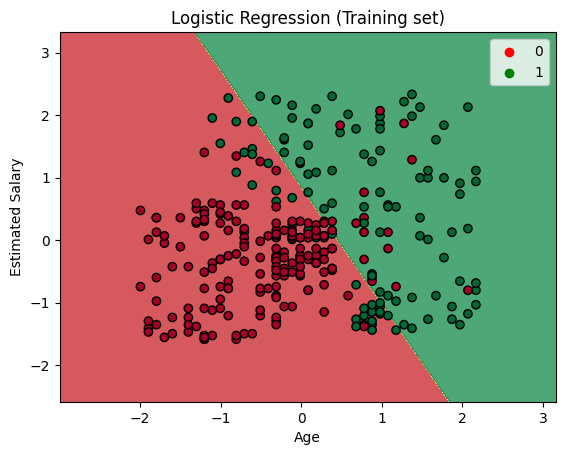

In [2]:
import numpy as np # Import the numpy library for numerical operations
import matplotlib.pyplot as plt # Import matplotlib.pyplot for plotting
import pandas as pd # Import pandas for data manipulation and analysis
from sklearn.model_selection import train_test_split  # Import train_test_split to split data into training and test sets
from sklearn.preprocessing import StandardScaler # Import StandardScaler for feature scaling
from sklearn.linear_model import LogisticRegression # Import LogisticRegression for the logistic regression model
from sklearn.metrics import confusion_matrix # Import confusion_matrix to evaluate model performance

# Load the dataset (assuming 'Social_Network_Ads.csv' is in the working directory)
dataset = pd.read_csv('/root/.cache/kagglehub/datasets/akram24/social-network-ads/versions/1/Social_Network_Ads.csv') # Load the CSV file into a pandas DataFrame
X = dataset.iloc[:, [2, 3]].values  # Select features (Age and Estimated Salary) using iloc
y = dataset.iloc[:, 4].values       # Select the target variable (Purchased) using iloc

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) # Split data into 75% training and 25% test sets

# Feature scaling
sc = StandardScaler() # Create a StandardScaler object
X_train = sc.fit_transform(X_train) # Fit and transform the training features
X_test = sc.transform(X_test) # Transform the test features

# Train the logistic regression model
classifier = LogisticRegression(random_state=0) # Create a LogisticRegression model with a random state
classifier.fit(X_train, y_train) # Train the model using the training data

# Predict the test set results
y_pred = classifier.predict(X_test) # Predict the target variable for the test set

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred) # Calculate the confusion matrix to evaluate the model
print("Confusion Matrix:") # Print a header for the confusion matrix
print(cm) # Print the confusion matrix

# Visualize the training set results with the decision boundary
X_set, y_set = X_train, y_train # Assign training data to X_set and y_set
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)) # Create a meshgrid of points for plotting the decision boundary
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=plt.cm.RdYlGn) # Plot the decision boundary with contourf
plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap=plt.cm.RdYlGn, edgecolors='k') # Plot the training data points
plt.title('Logistic Regression (Training set)') # Set the title of the plot
plt.xlabel('Age') # Set the label for the x-axis
plt.ylabel('Estimated Salary') # Set the label for the y-axis
plt.legend(handles=[plt.scatter([], [], c='red', label='0'),
                    plt.scatter([], [], c='green', label='1')],
           loc='upper right') # Add a legend to the plot
plt.show() # Display the plot

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
